In [2]:
import numpy as np
import pandas as pd
import glob
import os

from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
import nltk

#nltk.download('stopwords')
#from sklearn.feature_extraction.text import CountVectorizer

import re

from sklearn.decomposition import LatentDirichletAllocation as lda
from sklearn.model_selection import train_test_split

import warnings

import matplotlib.pyplot as plt

%matplotlib inline
warnings.filterwarnings("ignore")

%run 'HOTT_NLP_ENSAE/data.py'
%run 'HOTT_NLP_ENSAE/distances.py'
%run 'HOTT_NLP_ENSAE/hott.py'
%run 'HOTT_NLP_ENSAE/knn_classifier.py'

In [3]:
data_dir = 'data/nyt-comments'
#embed_path_300 = '/Users/Hugo/Documents/Cours/ENSAE/3A/S2/NLP/Projet/data/glove.6B/glove.6B.300d.txt'
embed_path = 'data/glove/glove.6B.300d.txt'
df_ = pd.read_csv(glob.glob(data_dir+'/Comments*.csv')[1], encoding = 'latin1')
df_ = df_.sample(frac=1).reset_index(drop=True)
#cols = df_.columns
#df_test = df_[0:1000].reset_index(drop = True)
#del df_
print(np.unique(df_.newDesk,return_counts=True))


(array(['Arts&Leisure', 'BookReview', 'Business', 'Climate', 'Culture',
       'Dining', 'Editorial', 'Express', 'Foreign', 'Games', 'Insider',
       'Investigative', 'Learning', 'Magazine', 'Metro', 'Metropolitan',
       'NYTNow', 'National', 'NewsDesk', 'Obits', 'OpEd', 'Photo',
       'Podcasts', 'Politics', 'RealEstate', 'Science', 'Smarter Living',
       'Society', 'SpecialSections', 'Sports', 'Styles', 'Summary',
       'SundayBusiness', 'TStyle', 'Travel', 'Upshot', 'Washington',
       'Weekend', 'Well'], dtype=object), array([  497,  1036, 21489,  3885,  4815,  1722, 10931,  2595, 15149,
        3875,   266,  4785,  4018,  6000,  5365,  1068,    36, 12293,
        1429,   826, 84665,   124,    14,  7582,  1587,  3517,   104,
          99,   125,  3240,   718,     6,   422,    10,   512,  1949,
       51576,   468,  6126]))


In [4]:
df_=df_[df_.newDesk.isin(["Sports","Climate","Games","Arts&Leisure","Science","Dining","Foreign"])]

In [5]:
print("lauching")
k = 20
stemming_ = True 
p_ = 1
n_word_keep_ = 20

# dataloading
data = load_data(df_, embed_path, stemming = stemming_, K = k, p = p_, n_word_keep = n_word_keep_, balance = True)

lauching


100% (400000 of 400000) |################| Elapsed Time: 0:00:26 Time:  0:00:26


extraction done in 29.823s.
stemming
The vocabulary has been reduced from 15618 words to 4165 words. This represents a reduction of 73.33 percent
computing LDA
iteration: 1 of max_iter: 100
iteration: 2 of max_iter: 100
iteration: 3 of max_iter: 100
iteration: 4 of max_iter: 100
iteration: 5 of max_iter: 100
iteration: 6 of max_iter: 100
iteration: 7 of max_iter: 100
iteration: 8 of max_iter: 100
iteration: 9 of max_iter: 100
iteration: 10 of max_iter: 100
iteration: 11 of max_iter: 100
iteration: 12 of max_iter: 100
iteration: 13 of max_iter: 100
iteration: 14 of max_iter: 100
iteration: 15 of max_iter: 100
iteration: 16 of max_iter: 100
iteration: 17 of max_iter: 100
iteration: 18 of max_iter: 100
iteration: 19 of max_iter: 100
iteration: 20 of max_iter: 100
iteration: 21 of max_iter: 100
iteration: 22 of max_iter: 100
iteration: 23 of max_iter: 100
iteration: 24 of max_iter: 100
iteration: 25 of max_iter: 100
iteration: 26 of max_iter: 100
iteration: 27 of max_iter: 100
iteration: 2

In [27]:
#représentation TSNE pour voir si ça a plus de sens
print("go")

C = data['cost_T']
def cust_hott(p,q):
    
    return hott(p, q, C, threshold=None)

print("colors")
import seaborn as sns
import matplotlib.colors as mcolors

sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
  
from sklearn.manifold import TSNE 
print("build TSNE")
Xtsne = pd.DataFrame(TSNE(n_components=2, metric = cust_hott,verbose=3).fit_transform(data['proportions']), columns = ['col1','col2'])
Xtsne['hue_'] = data['lib']


go
colors
build TSNE
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3128 samples in 1.282s...
[t-SNE] Computed neighbors for 3128 samples in 1755.596s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3128
[t-SNE] Computed conditional probabilities for sample 2000 / 3128
[t-SNE] Computed conditional probabilities for sample 3000 / 3128
[t-SNE] Computed conditional probabilities for sample 3128 / 3128
[t-SNE] Mean sigma: 0.471719
[t-SNE] Computed conditional probabilities in 0.136s
[t-SNE] Iteration 50: error = 84.3482208, gradient norm = 0.0016401 (50 iterations in 0.768s)
[t-SNE] Iteration 100: error = 83.5177155, gradient norm = 0.0060181 (50 iterations in 0.714s)
[t-SNE] Iteration 150: error = 83.2855377, gradient norm = 0.0005689 (50 iterations in 0.612s)
[t-SNE] Iteration 200: error = 83.2776642, gradient norm = 0.0004212 (50 iterations in 0.623s)
[t-SNE] Iteration 250: error = 83.2684784, gradient norm = 0.0003817 (50 iterations in 0.621s)
[t-SNE] KL dive

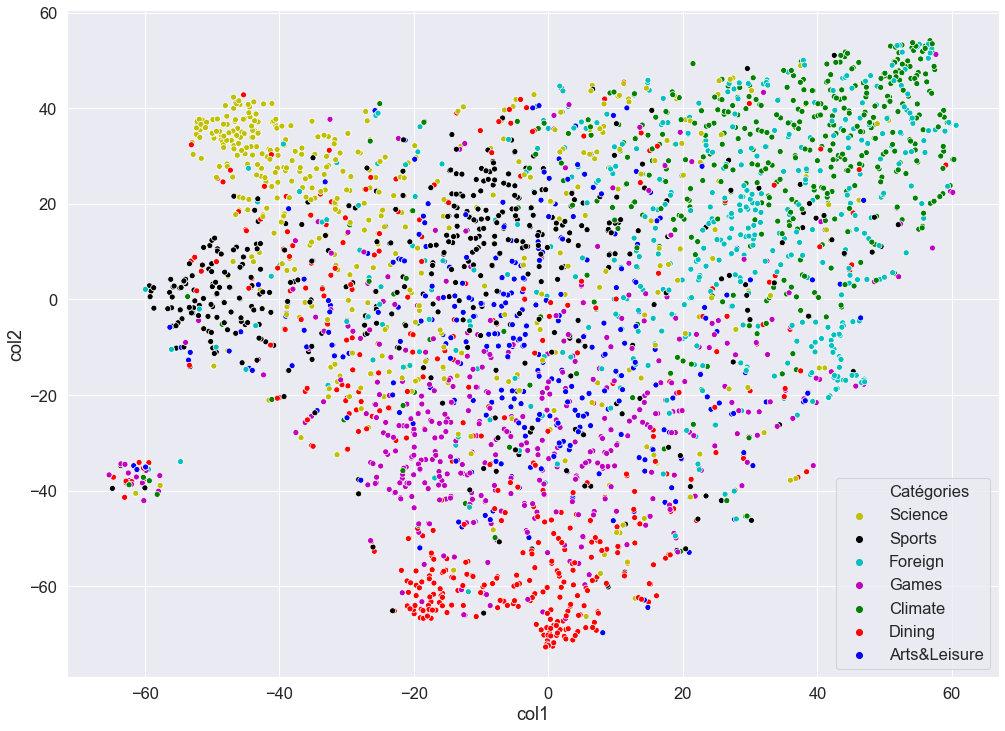

In [28]:
cols = [color for name, color in mcolors.BASE_COLORS.items()] 
colors = {}
for y_ in np.unique(data['y']) :
    colors[y_] = cols[y_+1]
colors={theme : c for theme, c in zip(np.unique(data["lib"]), colors.values())}

Xtsne.rename(columns={'hue_': 'Catégories'}, inplace=True)


fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(16.7, 12.27)
sns_plot = sns.scatterplot('col1','col2', data = Xtsne, hue = 'Catégories', palette = colors, legend = "full")
fig_ = sns_plot.get_figure()
fig_.savefig("tsne"+str(k)+"class.png")

In [34]:
#Keep K=20
df_ = pd.read_csv(glob.glob(data_dir+'/Comments*.csv')[1], encoding = 'latin1')
df_ = df_.sample(frac=1).reset_index(drop=True)
data = load_data(df_, embed_path, stemming = stemming_, K = 20, p = p_, n_word_keep = n_word_keep_, balance = True)

bow_train, bow_test, topic_train, topic_test, y_train, y_test = train_test_split(data['X'],
                                                                                 data['proportions'],
                                                                                 data['y'],
                                                                                 random_state= 0)
y_train = y_train.ravel()
y_test = y_test.ravel()
C = data['cost_T']

test_error_ = dict()
test_error = dict()
mat=calculate_matrix_dist(topic_train,topic_test,hott,C)
    
for neigh in np.arange(7, 100, 2):
    print(neigh)
    #hott_test_error, hott_pred = knn(topic_train, topic_test, y_train, y_test, hott, C, n_neighbors=neigh)
    hott_test_error, hott_pred = knn2(mat, y_train, y_test, n_neighbors=neigh)
    test_error[neigh] = hott_test_error
    print('Pour un %s topics et un nombre de voisin égal à %s l\'erreur sur la base de test est de l\'ordre de %s'%(k,neigh,hott_test_error))


100% (400000 of 400000) |################| Elapsed Time: 0:00:27 Time:  0:00:27


extraction done in 34.457s.
stemming
The vocabulary has been reduced from 31496 words to 9396 words. This represents a reduction of 70.17 percent
computing LDA
iteration: 1 of max_iter: 100
iteration: 2 of max_iter: 100
iteration: 3 of max_iter: 100
iteration: 4 of max_iter: 100
iteration: 5 of max_iter: 100
iteration: 6 of max_iter: 100
iteration: 7 of max_iter: 100
iteration: 8 of max_iter: 100
iteration: 9 of max_iter: 100
iteration: 10 of max_iter: 100
iteration: 11 of max_iter: 100
iteration: 12 of max_iter: 100
iteration: 13 of max_iter: 100
iteration: 14 of max_iter: 100
iteration: 15 of max_iter: 100
iteration: 16 of max_iter: 100
iteration: 17 of max_iter: 100
iteration: 18 of max_iter: 100
iteration: 19 of max_iter: 100
iteration: 20 of max_iter: 100
iteration: 21 of max_iter: 100
iteration: 22 of max_iter: 100
iteration: 23 of max_iter: 100
iteration: 24 of max_iter: 100
iteration: 25 of max_iter: 100
iteration: 26 of max_iter: 100
iteration: 27 of max_iter: 100
iteration: 2

100% (3339 of 3339) |####################| Elapsed Time: 0:33:46 Time:  0:33:46


7
Pour un 20 topics et un nombre de voisin égal à 7 l'erreur sur la base de test est de l'ordre de 0.8197064989517819
9
Pour un 20 topics et un nombre de voisin égal à 9 l'erreur sur la base de test est de l'ordre de 0.8125187181790956
11
Pour un 20 topics et un nombre de voisin égal à 11 l'erreur sur la base de test est de l'ordre de 0.8065289008685235
13
Pour un 20 topics et un nombre de voisin égal à 13 l'erreur sur la base de test est de l'ordre de 0.8035339922132375
15
Pour un 20 topics et un nombre de voisin égal à 15 l'erreur sur la base de test est de l'ordre de 0.7993411200958371
17
Pour un 20 topics et un nombre de voisin égal à 17 l'erreur sur la base de test est de l'ordre de 0.7966457023060797
19
Pour un 20 topics et un nombre de voisin égal à 19 l'erreur sur la base de test est de l'ordre de 0.7918538484576221
21
Pour un 20 topics et un nombre de voisin égal à 21 l'erreur sur la base de test est de l'ordre de 0.7900569032644504
23
Pour un 20 topics et un nombre de voisin 

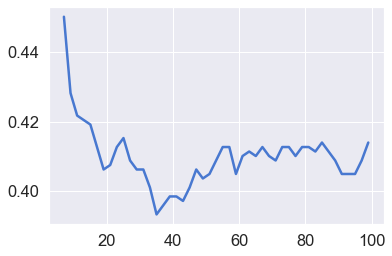

In [24]:
plt.plot(list(test_error.keys()),list(test_error.values()))

Counter({3: 137, 0: 124, 4: 122, 2: 121, 5: 111, 1: 83, -1: 80}) Counter({2: 129, 5: 128, 0: 120, 3: 116, 4: 107, 1: 103, -1: 75})
Confusion matrix, without normalization
[[43  0  3  5  9  4 11]
 [ 2 68  2 21 10  8  9]
 [ 3  3 60  5 12 14  6]
 [ 3 30  2 66 12  7  9]
 [ 9  5  6  5 76  6  9]
 [ 4  7  6  9  6 67  8]
 [16 11  4 10 12 16 59]]


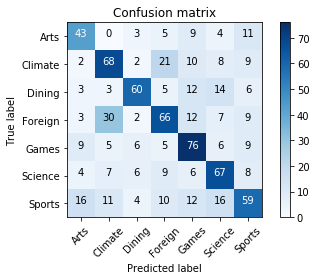

[['Foreign']
 ['Climate']
 ['Sports']
 ...
 ['Climate']
 ['Sports']
 ['Sports']] [[2]
 [0]
 [5]
 ...
 [0]
 [5]
 [5]]


In [33]:
#Matrice de confusion pour k=40 voisins avec hott_pred et y_test
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.xlim(-0.5, len(classes)-0.5)
    plt.ylim(len(classes)-0.5, -0.5)
  
    plt.show()
 

  
hott_test_error, hott_pred = knn2(mat, y_train, y_test, n_neighbors=37)
from collections import Counter
print(Counter(hott_pred),
Counter(y_test))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , hott_pred)
plot_confusion_matrix(cm , ['Arts','Climate','Dining','Foreign','Games','Science','Sports'],normalize=False)

print(data["lib"],data["y"])
dic={d:l for d,l in zip(np.ravel(data["lib"]),np.ravel(data["y"]))}

In [28]:
print(dic)
Counter(y_test)
['Climate','Sports','Science','Dining','Games','Arts']

{'Foreign': 2, 'Climate': 0, 'Sports': 5, 'Science': 4, 'Dining': 1, 'Games': 3, 'Arts&Leisure': -1}


Counter({0: 120, -1: 75, 3: 116, 4: 107, 1: 103, 2: 129, 5: 128})

# LDA interprétation

In [ ]:
print("launching")
data, y, lib= transform_dataframe(df_,balance=True)
y = y - 1

vocab1, embed_vocab1, bow_data1 = gen_data(data, embed_path)
print("stemming")
vocab, embed_vocab, bow_data = reduce_vocab(vocab1, embed_vocab1, bow_data1, embed_aggregate='mean') 
embeddings = np.array([embed_vocab[w] for w in vocab])

from collections import Counter
c=Counter(np.ravel(y))
l=Counter(np.ravel(lib))

encode2cat={k1:k2 for k1,k2 in zip(c.keys(),l.keys())}
print(c,encode2cat)

In [ ]:
import gensim
import gensim.models 
#from gensim.test.utils import common_texts
#from gensim.corpora.dictionary import Dictionary


lda = gensim.models.LdaModel(bow_data, num_topics=10)



In [ ]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
from scipy import sparse

tf_vectorizer = CountVectorizer(max_df=1, min_df=1, #cut off
                                max_features=None,
                                stop_words=None,
                                vocabulary={v : i for i,v in enumerate(vocab)}
                                ) # output is a sparse matrix
    

bow_data = sparse.csr_matrix(bow_data) 


print("computing LDA")
tic = time.time()

model = lda(n_components=20, max_iter=100, learning_method='online',learning_offset=50.,doc_topic_prior=1.,random_state=0,verbose=0)
model.fit(bow_data)
print("LDA fit done in %0.3fs." % (time.time() - tic))



In [ ]:
prepared_data=pyLDAvis.sklearn.prepare(model, bow_data,tf_vectorizer)


In [ ]:
prepared_data=pyLDAvis.sklearn.prepare(model, bow_data,tf_vectorizer)
pyLDAvis.save_html(prepared_data,'lda.html')

In [ ]:
# ok plus qu'à faire une LDA avec la bonne interprétation
#DPM
#refaire hyperparameter tuning en réduisant les classes !!
#consignes muller
#cours muller
#NEural network hahaha pour faire la tache LSTM

In [ ]:
from collections import Counter
df_["sectionName"]
df_.iloc[[0,20]]
df_.columns
df_['commentType']
Counter(df_["sectionName"])
Counter(df_["newDesk"])

import operator
dic=Counter(df_["newDesk"])
sorted_x = sorted(dic.items(), key=operator.itemgetter(1))
sorted_x
##
#filtrage sur moins de catégorie
#politique, culture climate games
#
Counter(np.ravel(y))



In [ ]:
k = 15
stemming_ = True 
p_ = 1
n_word_keep_ = 20

data = load_data(df, embed_path, stemming = stemming_, K = k, p = p_, n_word_keep = n_word_keep_, balance = True)
bow_train, bow_test, topic_train, topic_test, y_train, y_test = train_test_split(data['X'],
                                                                                 data['proportions'],
                                                                                 data['y'],
                                                                                 random_state= 0)

In [ ]:
#séparer les graphs des lancements
#chargemet colab, chargement à distances des bdds sinon go sous base sinon go embed 50

array([['Arts&Leisure'],
       ['Arts&Leisure'],
       ['Climate'],
       ...,
       ['Science'],
       ['Games'],
       ['Climate']], dtype=object)

category,Arts&Leisure,Climate,Dining,Foreign,Games,Science,Sports
topics,,,,,,,
0,2.48,4.21,28.24,9.70,4.42,0.43,1.28
1,7.14,0.21,1.16,0.81,44.81,1.50,1.70
2,0.62,0.84,20.14,0.00,1.77,0.64,0.00
3,1.55,2.32,2.78,2.02,1.55,3.85,4.26
4,1.86,3.58,2.55,1.21,1.77,3.43,2.77
5,15.53,4.63,1.16,1.41,1.55,0.86,1.70
6,2.48,2.53,2.31,1.82,2.43,2.36,8.94
7,1.86,2.53,1.62,3.43,3.75,2.78,1.70
8,6.52,2.74,1.16,1.01,2.21,1.28,3.19
